In [16]:
!Igreen-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-119-8297-1c6595f8a7ff.png)

zsh:1: unknown file attribute: h


In [10]:
# First let's import the packages we will use in this project
# We do this all now or as we need them

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None


# Now we need to read in the data
df = pd.read_csv(r'/Users/vietthanhphan/Downloads/movies.csv')

In [11]:
|# Now let's take a look at the data

df.head()

SyntaxError: invalid syntax (1271798566.py, line 1)

In [12]:
# We need to see if we have any missing data
# Let's loop through the data and see if there is anything missing
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [13]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

### Remove Country from 'released'

In [15]:
df['date_released_afterremoved'] = df['released'].str.split("\s+\(").str[0]
df.head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,date_released_afterremoved
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,"June 13, 1980"
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,"July 2, 1980"
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,"June 20, 1980"
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,"July 2, 1980"
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,"July 25, 1980"


# Split Country from 'Released column'

In [8]:
df.dtypes

name                      object
rating                    object
genre                     object
year                       int64
released                  object
score                    float64
votes                    float64
director                  object
writer                    object
star                      object
country                   object
budget                   float64
gross                    float64
company                   object
runtime                  float64
country_released          object
date_country_released     object
dtype: object

In [16]:
df.pop('released')
df.head()

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,date_released_afterremoved
0,The Shining,R,Drama,1980,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,"June 13, 1980"
1,The Blue Lagoon,R,Adventure,1980,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,"July 2, 1980"
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,"June 20, 1980"
3,Airplane!,PG,Comedy,1980,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,"July 2, 1980"
4,Caddyshack,R,Comedy,1980,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,"July 25, 1980"


In [24]:
df.dtypes

name                           object
rating                         object
genre                          object
year                            int64
score                         float64
votes                         float64
director                       object
writer                         object
star                           object
country                        object
budget                        float64
gross                         float64
company                        object
runtime                       float64
date_released_afterremoved     object
dtype: object

In [17]:
df['year_releasded_new'] = pd.DatetimeIndex(df['date_released_afterremoved']).year
df.head()

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,date_released_afterremoved,year_releasded_new
0,The Shining,R,Drama,1980,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,"June 13, 1980",1980.0
1,The Blue Lagoon,R,Adventure,1980,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,"July 2, 1980",1980.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,"June 20, 1980",1980.0
3,Airplane!,PG,Comedy,1980,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,"July 2, 1980",1980.0
4,Caddyshack,R,Comedy,1980,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,"July 25, 1980",1980.0


In [148]:
df['year_releasded_new'] = df['year_releasded_new'].astype(str).str[:4]
df.dtypes

name                           object
rating                         object
genre                          object
year                            int64
score                         float64
votes                         float64
director                       object
writer                         object
star                           object
country                        object
budget                        float64
gross                         float64
company                        object
runtime                       float64
date_released_afterremoved     object
year_releasded_new             object
dtype: object

In [18]:
df.head()

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,date_released_afterremoved,year_releasded_new
0,The Shining,R,Drama,1980,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,"June 13, 1980",1980.0
1,The Blue Lagoon,R,Adventure,1980,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,"July 2, 1980",1980.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,"June 20, 1980",1980.0
3,Airplane!,PG,Comedy,1980,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,"July 2, 1980",1980.0
4,Caddyshack,R,Comedy,1980,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,"July 25, 1980",1980.0


In [19]:
df = df.sort_values(by=['gross'], inplace=False, ascending=False)

# DROP ANY NAN VALUES from budget and gross column

In [20]:
df = df.dropna(subset = ['budget', 'gross'])

In [21]:
df.head()

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,date_released_afterremoved,year_releasded_new
5445,Avatar,PG-13,Action,2009,7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0,"December 18, 2009",2009.0
7445,Avengers: Endgame,PG-13,Action,2019,8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0,"April 26, 2019",2019.0
3045,Titanic,PG-13,Drama,1997,7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0,"December 19, 1997",1997.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0,"December 18, 2015",2015.0
7244,Avengers: Infinity War,PG-13,Action,2018,8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0,"April 27, 2018",2018.0


In [22]:
df.pop('year')
df.head()

,name,rating,genre,score,votes,director,writer,star,country,budget,gross,company,runtime,date_released_afterremoved,year_releasded_new
5445,Avatar,PG-13,Action,7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0,"December 18, 2009",2009.0
7445,Avengers: Endgame,PG-13,Action,8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0,"April 26, 2019",2019.0
3045,Titanic,PG-13,Drama,7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0,"December 19, 1997",1997.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0,"December 18, 2015",2015.0
7244,Avengers: Infinity War,PG-13,Action,8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0,"April 27, 2018",2018.0


#  Scatter plot with budget vs gross

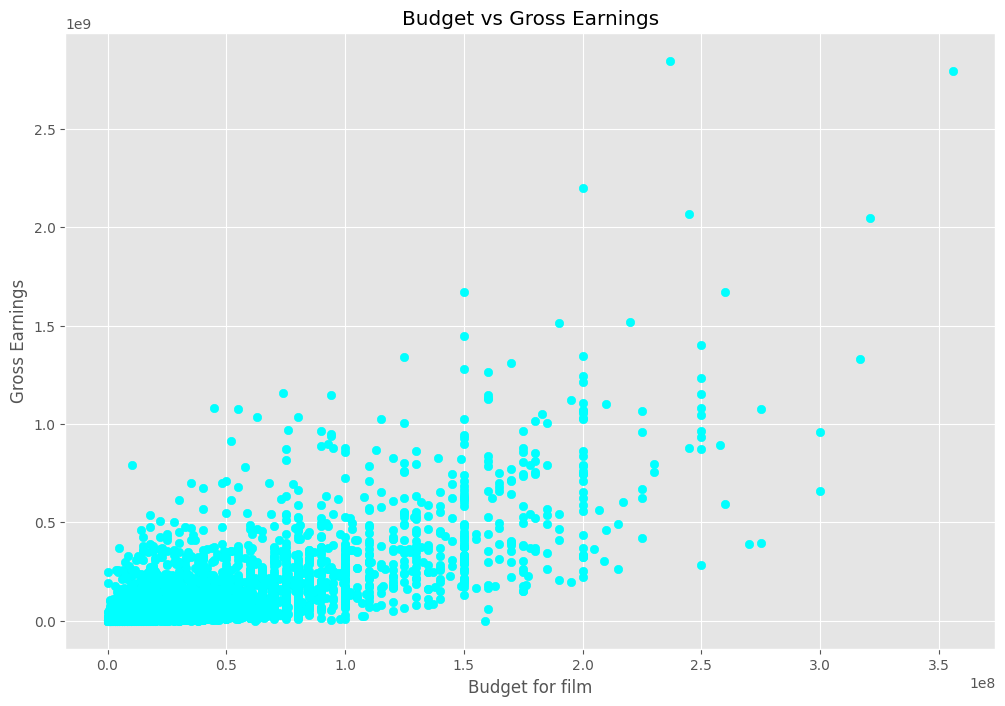

In [114]:
plt.scatter(x=df['budget'], y=df['gross'], color='cyan')
plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget for film')
plt.ylabel('Gross Earnings')
plt.show()

# Plot the correlation between Budget and Gross using Seaborn

<AxesSubplot: xlabel='budget', ylabel='gross'>

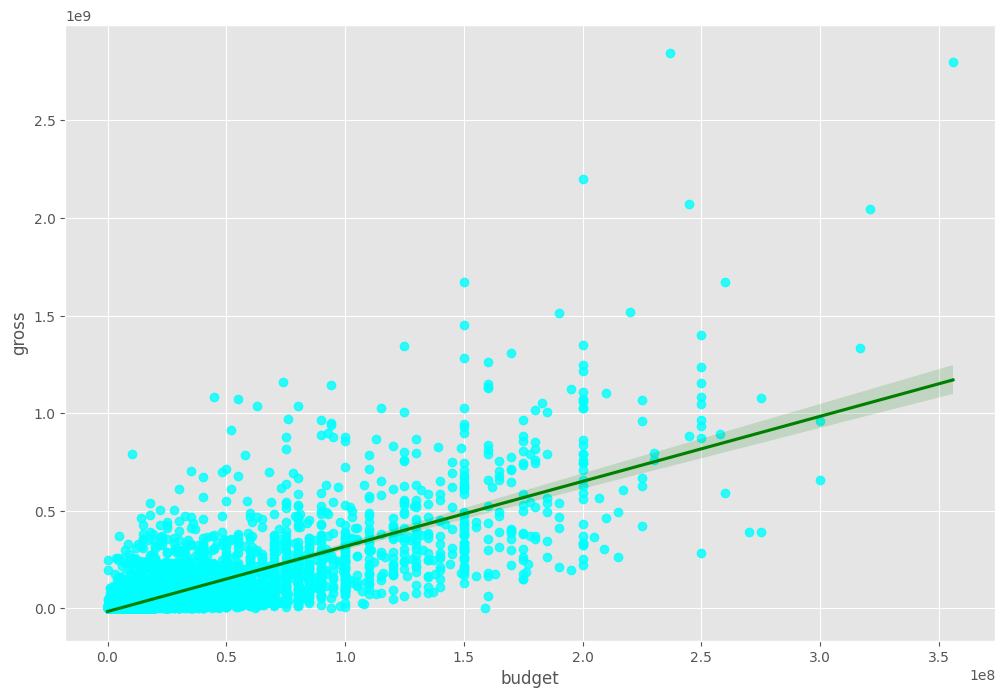

In [113]:
sns.regplot(x='budget', y='gross', data=df, scatter_kws={'color':'cyan'}, line_kws={'color':'green'})

In [72]:
df.corr(method='pearson')

/var/folders/xn/t7qqntf55k9dw00kvrf28cww0000gn/T/ipykernel_18077/851377781.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='pearson')


,score,votes,budget,gross,runtime,year_releasded_new
score,1.000000,0.473809,0.071792,0.222143,0.414580,0.061029
votes,0.473809,1.000000,0.440021,0.614904,0.352437,0.202883
budget,0.071792,0.440021,1.000000,0.740395,0.318595,0.320245
gross,0.222143,0.614904,0.740395,1.000000,0.275596,0.268626
runtime,0.414580,0.352437,0.318595,0.275596,1.000000,0.074432
year_releasded_new,0.061029,0.202883,0.320245,0.268626,0.074432,1.000000


In [152]:
df['year_releasded_new'] = df['year_releasded_new'].astype(int)
df.dtypes

name                           object
rating                         object
genre                          object
score                         float64
votes                         float64
director                       object
writer                         object
star                           object
country                        object
budget                        float64
gross                         float64
company                        object
runtime                       float64
date_released_afterremoved     object
year_releasded_new              int64
dtype: object

## Relise that the high correlation between Budget vs Gross= 0.74, Gross vs Votes=0.61

/var/folders/xn/t7qqntf55k9dw00kvrf28cww0000gn/T/ipykernel_18077/380738121.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr(method='pearson')


NameError: name 'pit' is not defined

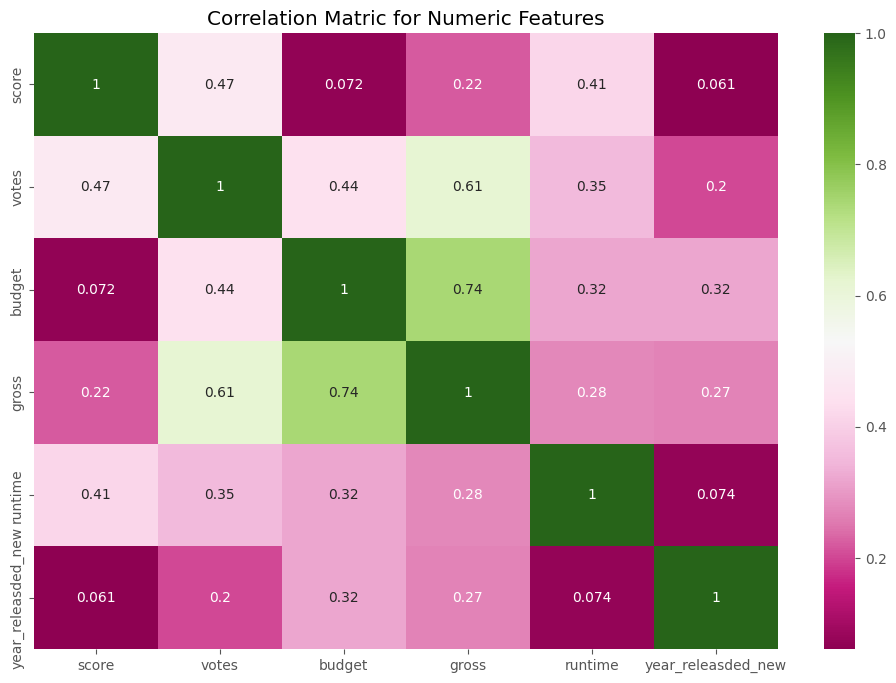

In [115]:
correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True, cmap='PiYG')
plt.title('Correlation Matric for Numeric Features')
pit.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

## Convert object --> numberical to looking for more correlation

In [140]:
df_numerized = df
for col_name in df_numerized.columns:
    if (df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
df_numerized

,name,rating,genre,score,votes,director,writer,star,country,budget,gross,company,runtime,date_released_afterremoved,year_releasded_new
5445,387,5,0,7.8,1100000.0,787,1265,1538,47,237000000.0,2.847246e+09,1388,162.0,497,2009
7445,389,5,0,8.4,903000.0,106,515,1474,47,356000000.0,2.797501e+09,987,181.0,125,2019
3045,4923,5,6,7.8,1100000.0,787,1265,1076,47,200000000.0,2.201647e+09,1388,194.0,503,1997
6663,3656,5,0,7.8,876000.0,770,1810,357,47,245000000.0,2.069522e+09,949,138.0,499,2015
7244,390,5,0,8.4,897000.0,106,515,1474,47,321000000.0,2.048360e+09,987,149.0,133,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2434,2981,5,0,4.5,1900.0,1810,3112,187,47,5000000.0,2.970000e+03,1382,97.0,1389,1994
3681,1599,3,6,6.8,43000.0,954,1687,528,6,5000000.0,2.554000e+03,468,108.0,1631,2001
272,2921,6,9,3.9,2300.0,263,55,1477,47,800000.0,2.270000e+03,584,85.0,1445,1982
2417,2401,-1,6,7.3,5100.0,23,1220,1687,26,11900000.0,5.960000e+02,492,134.0,58,1993


In [23]:
df.head()

,name,rating,genre,score,votes,director,writer,star,country,budget,gross,company,runtime,date_released_afterremoved,year_releasded_new
5445,Avatar,PG-13,Action,7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0,"December 18, 2009",2009.0
7445,Avengers: Endgame,PG-13,Action,8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0,"April 26, 2019",2019.0
3045,Titanic,PG-13,Drama,7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0,"December 19, 1997",1997.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0,"December 18, 2015",2015.0
7244,Avengers: Infinity War,PG-13,Action,8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0,"April 27, 2018",2018.0


NameError: name 'pit' is not defined

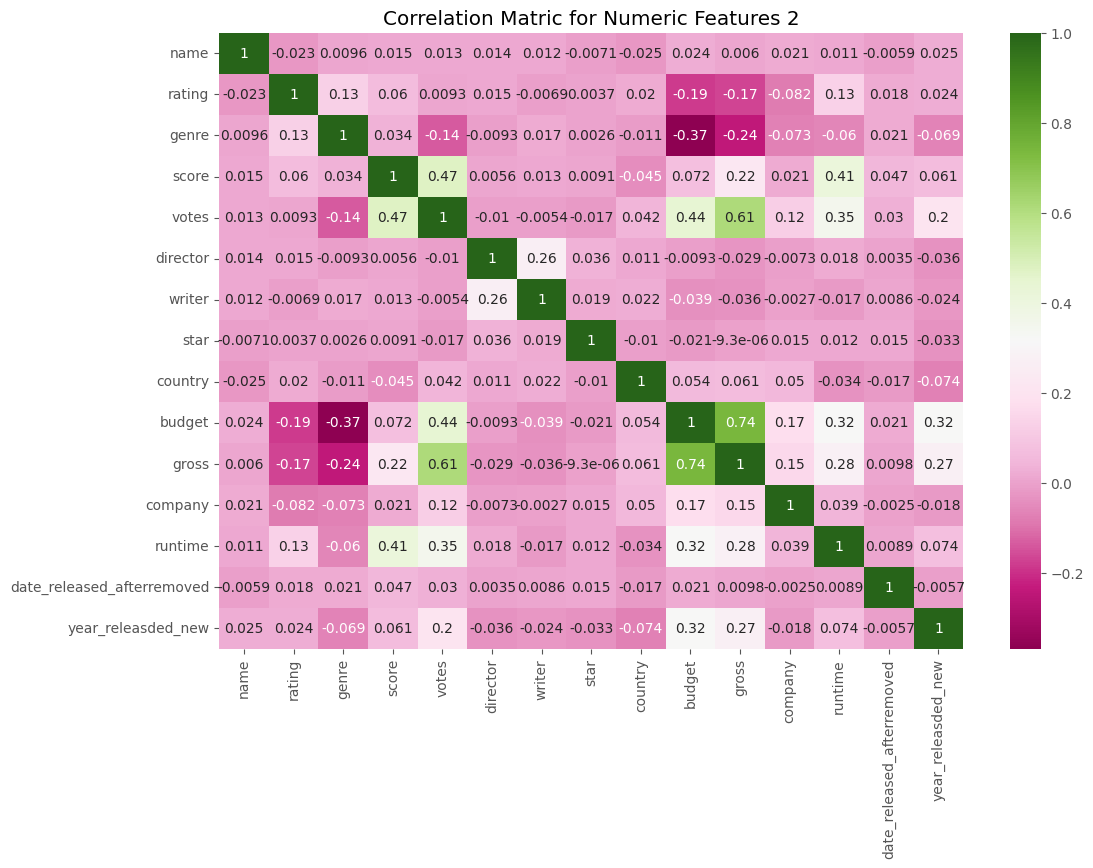

In [141]:
correlation_new_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_new_matrix, annot=True, cmap='PiYG')
plt.title('Correlation Matric for Numeric Features 2')
pit.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [154]:
df_numerized.corr()

,name,rating,genre,score,votes,director,writer,star,country,budget,gross,company,runtime,date_released_afterremoved,year_releasded_new
name,1.000000,-0.023013,0.009617,0.014955,0.012915,0.013699,0.011602,-0.007109,-0.024555,0.023698,0.005966,0.021209,0.010800,-0.005887,0.024734
rating,-0.023013,1.000000,0.128102,0.059550,0.009255,0.014847,-0.006923,0.003737,0.020148,-0.186892,-0.168814,-0.082189,0.133239,0.018096,0.023634
genre,0.009617,0.128102,1.000000,0.034061,-0.136457,-0.009303,0.017500,0.002619,-0.010847,-0.368900,-0.244380,-0.073293,-0.060186,0.020867,-0.068848
score,0.014955,0.059550,0.034061,1.000000,0.473809,0.005573,0.012860,0.009121,-0.044690,0.071792,0.222143,0.021054,0.414580,0.046659,0.061029
votes,0.012915,0.009255,-0.136457,0.473809,1.000000,-0.010198,-0.005394,-0.017140,0.042146,0.440021,0.614904,0.119366,0.352437,0.029816,0.202883
director,0.013699,0.014847,-0.009303,0.005573,-0.010198,1.000000,0.262940,0.036289,0.011108,-0.009340,-0.029366,-0.007337,0.018082,0.003518,-0.036281
writer,0.011602,-0.006923,0.017500,0.012860,-0.005394,0.262940,1.000000,0.019273,0.022153,-0.039420,-0.035999,-0.002658,-0.016672,0.008589,-0.024397
star,-0.007109,0.003737,0.002619,0.009121,-0.017140,0.036289,0.019273,1.000000,-0.010135,-0.021282,-0.000009,0.015086,0.012439,0.015209,-0.033168
country,-0.024555,0.020148,-0.010847,-0.044690,0.042146,0.011108,0.022153,-0.010135,1.000000,0.054372,0.060929,0.049559,-0.033554,-0.017051,-0.073732
budget,0.023698,-0.186892,-0.368900,0.071792,0.440021,-0.009340,-0.039420,-0.021282,0.054372,1.000000,0.740395,0.171385,0.318595,0.021113,0.320245


In [155]:
correlation_matrix_f = df_numerized.corr()
corr_pairs = correlation_matrix_f.unstack()
corr_pairs

name                name                          1.000000
                    rating                       -0.023013
                    genre                         0.009617
                    score                         0.014955
                    votes                         0.012915
                                                    ...   
year_releasded_new  gross                         0.268626
                    company                      -0.017823
                    runtime                       0.074432
                    date_released_afterremoved   -0.005721
                    year_releasded_new            1.000000
Length: 225, dtype: float64

In [157]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

genre                       budget                       -0.368900
budget                      genre                        -0.368900
genre                       gross                        -0.244380
gross                       genre                        -0.244380
budget                      rating                       -0.186892
                                                            ...   
score                       score                         1.000000
genre                       genre                         1.000000
rating                      rating                        1.000000
date_released_afterremoved  date_released_afterremoved    1.000000
year_releasded_new          year_releasded_new            1.000000
Length: 225, dtype: float64

In [164]:
high_corr = sorted_pairs[sorted_pairs > 0.4]
high_corr

runtime                     score                         0.414580
score                       runtime                       0.414580
votes                       budget                        0.440021
budget                      votes                         0.440021
score                       votes                         0.473809
votes                       score                         0.473809
                            gross                         0.614904
gross                       votes                         0.614904
                            budget                        0.740395
budget                      gross                         0.740395
name                        name                          1.000000
star                        star                          1.000000
runtime                     runtime                       1.000000
company                     company                       1.000000
gross                       gross                         1.00

# Votes and Budget also have HIGH CORRELATION
